# Supp Fig 2 (Covarying parameter values)
### This code runs the simulations and reproduces SFig 2A-2C

In [1]:
from KeyFunctions.TheoryFunctions import *
from KeyFunctions.SimulationFunctions import *

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib as mp

### Default Parameters

In [2]:
# Strength and structure of noise
sigE=1; sigI=1; c=0

# 'Diffusion' matrix for the noise term
D_private = np.diag([np.sqrt(1-c)*sigE, np.sqrt(1-c)*sigE, sigI, sigI])
D_shared = np.array([np.sqrt(c)*sigE,np.sqrt(c)*sigE,0, 0])
DMatrix = np.c_[D_private,D_shared]

# Time constants
tau_E=15; tau_I=15
tau = np.array([[tau_E], [tau_E], [tau_I], [tau_I]])

# Connectivity parameters
Wee = 1.15; alpha = 0.15; 
Wii=0.5; Wei=1; Wie=1
beta = 0; gamma = 0; zeta = 0
W = np.block([[Wee, alpha*Wee, -Wei, -beta*Wei],
              [alpha*Wee, Wee, -beta*Wei, -Wei],
              [Wie, gamma*Wie, -Wii, -zeta*Wii],
              [gamma*Wie, Wie, -zeta*Wii, -Wii]])

# Numerics
K = 200 # Discretize 2D parameter space

### SFig 2A: Covary $\zeta$ and $\beta$

In [3]:
Wee = 1.15; alpha = 0.15; Wii=0.5; Wei=1; Wie=1
beta = 0; gamma = 0; zeta = 0
W = np.block([[Wee, alpha*Wee, -Wei, -beta*Wei],
              [alpha*Wee, Wee, -beta*Wei, -Wei],
              [Wie, gamma*Wie, -Wii, -zeta*Wii],
              [gamma*Wie, Wie, -zeta*Wii, -Wii]])

ratioVec = [0.25, 0.5, 1, 2]
Corrs_zb = np.zeros((K,np.shape(ratioVec)[0]))
crossConnection = np.linspace(0,1,K)
for i in range(K):   
    counter = 0
    for r in ratioVec:
        W[2,3] = -crossConnection[i]*Wii # I->I
        W[3,2] = -crossConnection[i]*Wii # I->I
        W[0,3] = -r*crossConnection[i]*Wei # I->E
        W[1,2] = -r*crossConnection[i]*Wei # I->E

        _, Corr,_,_ = corrTheory(W, DMatrix)
        Corrs_zb[i,counter] = Corr[0,1]
        counter = counter + 1

### SFig 2B: Covary $\zeta$ and $\gamma$

In [4]:
Wee = 1.15; alpha = 0.15; Wii=0.5; Wei=1; Wie=1
beta = 0; gamma = 0; zeta = 0
W = np.block([[Wee, alpha*Wee, -Wei, -beta*Wei],
              [alpha*Wee, Wee, -beta*Wei, -Wei],
              [Wie, gamma*Wie, -Wii, -zeta*Wii],
              [gamma*Wie, Wie, -zeta*Wii, -Wii]])


ratioVec = [0.25, 0.5, 1, 2]
Corrs_zg = np.zeros((K,np.shape(ratioVec)[0]))
crossConnection = np.linspace(0,1,K)
for i in range(K):   
    counter = 0
    for r in ratioVec:
        W[2,3] = -crossConnection[i]*Wii # I->I
        W[3,2] = -crossConnection[i]*Wii # I->I
        W[2,1] = r*crossConnection[i]*Wie # E->I
        W[3,0] = r*crossConnection[i]*Wie # E->I

        _, Corr, _,_ = corrTheory(W, DMatrix)
        Corrs_zg[i,counter] = Corr[0,1]
        counter = counter + 1

### SFig 2C: Covary $\beta$ and $\gamma$

In [5]:
Wee = 1.15; alpha = 0.15; Wii=0.5; Wei=1; Wie=1
beta = 0; gamma = 0; zeta = 0
W = np.block([[Wee, alpha*Wee, -Wei, -beta*Wei],
              [alpha*Wee, Wee, -beta*Wei, -Wei],
              [Wie, gamma*Wie, -Wii, -zeta*Wii],
              [gamma*Wie, Wie, -zeta*Wii, -Wii]])

ratioVec = [0.25, 0.5, 1, 2]
Corrs_bg = np.zeros((K,np.shape(ratioVec)[0]))
crossConnection = np.linspace(0,1,K)
for i in range(K):   
    counter = 0
    for r in ratioVec:
        W[0,3] = -crossConnection[i]*Wei # I->E
        W[1,2] = -crossConnection[i]*Wei # I->E
        W[2,1] = r*crossConnection[i]*Wie # E->I
        W[3,0] = r*crossConnection[i]*Wie # E->I

        _, Corr,_,_ = corrTheory(W, DMatrix)
        Corrs_bg[i,counter] = Corr[0,1]
        counter = counter + 1

## Plot the results

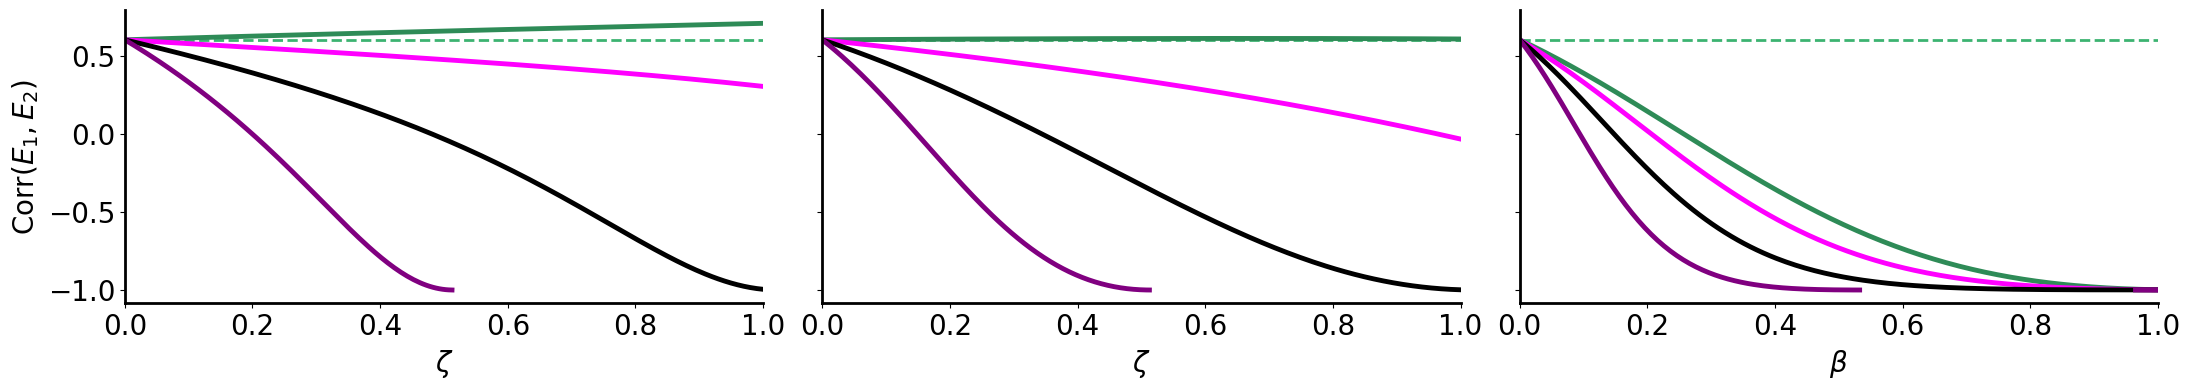

In [6]:
colors = ['seagreen','magenta','black','purple']

fig, axs = plt.subplots(figsize=(22,4),nrows=1, ncols=3, sharey=True)

#plot invariant line
for i in range(3):
    axs[i].axhline(y=Corrs_zb[0,0], linestyle='--', color='mediumseagreen', linewidth=2)

for i in range(4):
    axs[0].plot(crossConnection, Corrs_zb[:,i], linewidth=3.5, color=colors[i])
    axs[1].plot(crossConnection, Corrs_zg[:,i], linewidth=3.5, color=colors[i])
    axs[2].plot(crossConnection, Corrs_bg[:,i], linewidth=3.5, color=colors[i])
    
for i in range(3):
    axs[i].spines['left'].set_linewidth(2)
    axs[i].spines['bottom'].set_linewidth(2)
    axs[i].spines['right'].set_color('none')
    axs[i].spines['top'].set_color('none')
    axs[i].xaxis.set_tick_params(labelsize=20)
    axs[i].yaxis.set_tick_params(labelsize=20)
    axs[i].set_xlim(0,1) 
    #axs[i].axhline(y=Corrs_zb[0,0], linestyle='--', color='mediumseagreen')


axs[0].set_xlabel(r'$\zeta$', fontsize=20, labelpad=5)
axs[0].set_ylabel(r'Corr$(E_1,E_2)$', fontsize=20, labelpad=5)
axs[1].set_xlabel(r'$\zeta$', fontsize=20, labelpad=5)
axs[2].set_xlabel(r'$\beta$', fontsize=20, labelpad=5)    

plt.tight_layout()
plt.show()   